In [54]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

(338, 600)


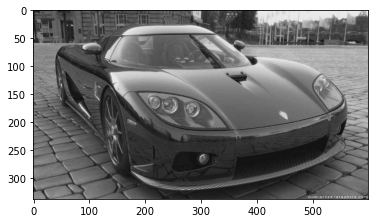

In [55]:
img = cv2.imread('PgaNb.png',0)
# img=cv2.resize(img,(512,512))
# fig=plt.figure(figsize=(15,15))
# ax=fig.add_subplot(111)
plt.imshow(img,'gray')
print(img.shape)

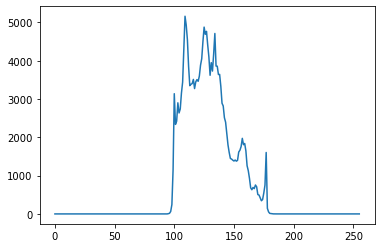

In [56]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

In [57]:
print(img)

[[104 107 109 ... 176 179 176]
 [103 105 106 ... 175 178 177]
 [104 107 108 ... 172 175 176]
 ...
 [142 142 142 ... 156 146 141]
 [142 142 142 ... 131 134 142]
 [142 142 142 ... 120 121 134]]


In [58]:
min(map(min, img))

93

In [59]:
freq_arr=np.zeros(256,'uint64')
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        freq_arr[img[i][j]]=freq_arr[img[i][j]]+1

# print(freq_arr)

sum=img.shape[0]*img.shape[1]
pdf=np.zeros(256,'float64')
for i in range (256):
    pdf[i]=freq_arr[i]/sum
# print(pdf)



In [60]:
running_sum=np.zeros(256,'float64')
running_sum[0]=pdf[0]
for i in range(1,256):
    running_sum[i]=running_sum[i-1]+pdf[i]

for i in range(1,256):
    running_sum[i]=running_sum[i]*255

hist_eq_level=np.zeros(256,'uint16')
for i in range(256):
    hist_eq_level[i]=round(running_sum[i])
print(hist_eq_level)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   2   6   9  12  15  19  22  26  31
  36  42  49  54  59  63  68  72  76  80  85  89  94  98 103 108 114 120
 126 132 137 142 147 152 157 162 168 173 178 182 187 191 195 198 201 204
 207 209 211 213 215 217 218 220 222 224 226 228 230 232 235 237 239 241
 242 243 244 245 246 247 247 248 249 250 250 251 251 252 253 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

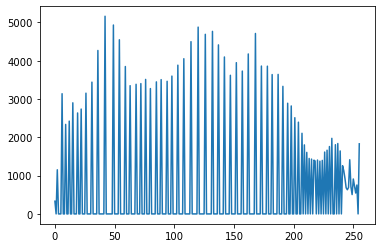

In [61]:
new_img=np.zeros(img.shape,'uint16')
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        new_img[i][j]=hist_eq_level[img[i][j]]

# print(new_img)
hist1 = cv2.calcHist([new_img],[0],None,[256],[0,256])
plt.plot(hist1) 
plt.show()

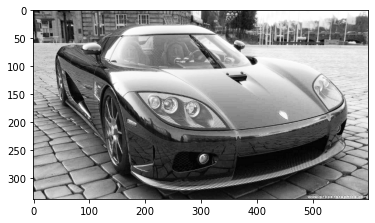

In [62]:
plt.imshow(new_img,'gray')